### Code réalisé par Robin Mathelier en marge du livre "Hands-on Machine Learning with Scikit-Learn and Tensorflow" (O'Reilly, 2017) d'Aurélien Géron

In [1]:
import os
os.chdir('C:/Users/robin/Dropbox/Datasets')
os.getcwd()

import tarfile

from six.moves import urllib

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import matplotlib
from mpl_toolkits.mplot3d import Axes3D


import numpy as np
import numpy.linalg as alg

from scipy.ndimage import interpolation

import sklearn.linear_model

from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import PolynomialFeatures

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

from sklearn.manifold import LocallyLinearEmbedding

In [2]:
mnist_train = pd.read_csv(r'C:\Users\robin\Dropbox\Datasets\mnist-in-csv\mnist_train.csv')
mnist_test = pd.read_csv(r'C:\Users\robin\Dropbox\Datasets\mnist-in-csv\mnist_test.csv')

FileNotFoundError: [Errno 2] File b'C:\\Users\\robin\\Dropbox\\Datasets\\mnist-in-csv\\mnist_train.csv' does not exist: b'C:\\Users\\robin\\Dropbox\\Datasets\\mnist-in-csv\\mnist_train.csv'

In [ ]:
X_train = mnist_train.drop('label',axis = 1)
y_train = mnist_train['label']
X_test = mnist_test.drop('label',axis = 1)
y_test = mnist_test['label']

In [ ]:
pca = PCA()

In [ ]:
pca.fit(X_train)

In [ ]:
X_reduced = pca.fit_transform(X_train)

In [ ]:
Y = np.cumsum(pca.explained_variance_ratio_)
X = range(1,len(Y)+1)

In [ ]:
plt.plot(X,Y)
plt.xlabel('dimensions', size = 15)
plt.ylabel('variance expliquée', size = 15)
plt.xlim((0,400))
plt.axhline(y=0.95, color = 'r', linestyle = '--')

In [3]:
data = datasets.make_swiss_roll(n_samples=10000, noise=0.0, random_state=None)

In [4]:
X = data[0]
Y = data[1]

In [5]:
X_0 = X[:,0]
X_1 = X[:,1]
X_2 = X[:,2]

In [6]:
Y

array([11.21209904,  6.9596021 , 10.93907434, ...,  7.91389955,
        5.04623674,  6.12933677])

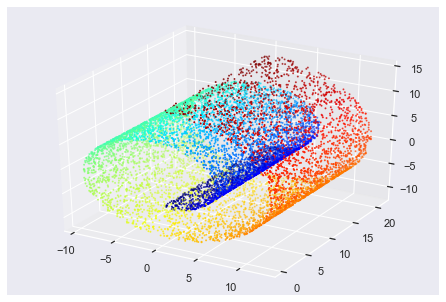

In [7]:
ax = Axes3D(plt.figure())
ax.scatter(X_0, X_1, X_2, s  = 1,c=Y,cmap = plt.get_cmap('jet'))

In [8]:
linear_pca = KernelPCA(n_components = 3, kernel = 'linear', gamma = 0.04)

In [9]:
X_reduced = linear_pca.fit_transform(X)

In [10]:
X_reduced_0 = X_reduced[:,0]
X_reduced_1 = X_reduced[:,1]

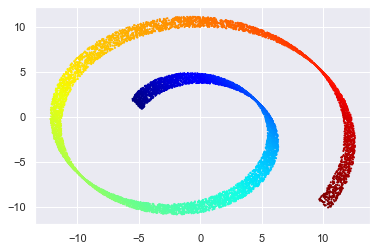

In [11]:
plt.scatter(X_reduced_0, X_reduced_1, s = 1, cmap = plt.get_cmap('jet'), c=Y)

In [12]:
sigmoid_pca = KernelPCA(n_components = 3, kernel = 'sigmoid', gamma = 0.001)

In [13]:
X_reduced = sigmoid_pca.fit_transform(X)

C:\Users\robin\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:516: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


In [14]:
X_reduced_0 = X_reduced[:,0]
X_reduced_1 = X_reduced[:,1]

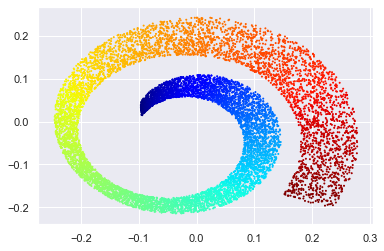

In [15]:
plt.scatter(X_reduced_0, X_reduced_1, s = 1, cmap = plt.get_cmap('jet'), c=Y)

In [16]:
rbf_pca = KernelPCA(n_components = 3, kernel = 'rbf', gamma = 0.04)

In [ ]:
X_reduced = rbf_pca.fit_transform(X)

In [ ]:
X_reduced_0 = X_reduced[:,0]
X_reduced_1 = X_reduced[:,1]

In [ ]:
plt.scatter(X_reduced_0, X_reduced_1, s = 1, cmap = plt.get_cmap('jet'), c=Y)

In [ ]:
lle = LocallyLinearEmbedding(n_components = 2, n_neighbors = 10)
X_reduced = lle.fit_transform(X)

In [ ]:
X_reduced_0 = X_reduced[:,0]
X_reduced_1 = X_reduced[:,1]

In [ ]:
plt.scatter(X_reduced_0, X_reduced_1, s = 1, cmap = plt.get_cmap('jet'), c=Y)